In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import fft
from scipy import signal
import scipy.linalg as la

In [2]:
df = pd.read_csv('4_Chest_sweater.txt', sep = '\t')
f = df['Log Freq'][0]
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,100,1555414552,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113,0.788006,0.002899,-0.432874,-0.437788
1,5,100,1555414552,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128,0.183978,-0.428877,0.002594,0.884426
2,5,100,1555414552,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136,0.128994,-0.427229,0.000702,0.894894
3,5,100,1555414552,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145,0.113618,-0.421033,-0.001770,0.899899
4,5,100,1555414552,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157,0.107202,-0.424787,-0.001251,0.898923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,5,100,1555415471,-890.722,-81.008,446.764,-2.682927,2.926829,0.365854,144,47,-50,0.017279,0.534410,0.040437,-0.844081
14934,5,100,1555415471,-885.964,-76.006,459.025,-3.902439,3.292683,0.365854,146,45,-51,0.016416,0.535050,0.041231,-0.843654
14935,5,100,1555415471,-879.681,-77.714,475.068,-3.048780,2.804878,0.365854,144,46,-54,0.015920,0.534349,0.041780,-0.844081
14936,5,100,1555415471,-894.992,-76.311,502.701,0.121951,1.463415,0.609756,144,45,-53,0.015192,0.531663,0.041749,-0.845790


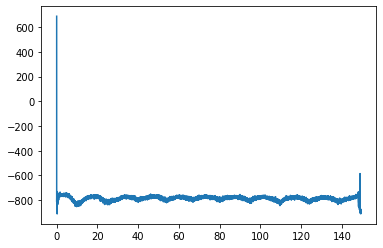

In [3]:
time = np.arange(df.shape[0])/f
sig = df['AccX']
plt.plot(time, sig)

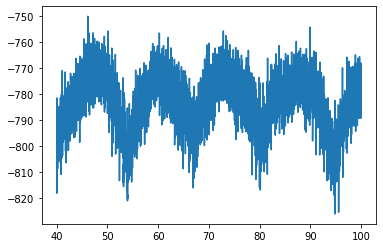

In [5]:
t = time[(time>40)&(time<100)]
g = sig[(time>40)&(time<100)]
plt.plot(t, g)

In [7]:
BPM_min = 40/60
BPM_max = 100/60

max freq:  53.008834805800966


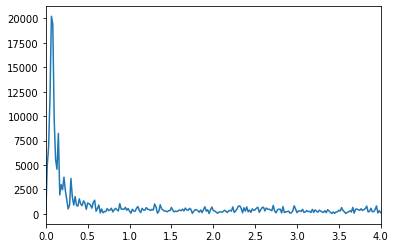

In [8]:
g_t = fft.rfft(g-g.mean())
power = np.abs(g_t)
freq = fft.rfftfreq(len(g), d = 1/f)
plt.plot(freq, power)
plt.xlim(0,4)
search_freq = freq[(freq > BPM_min) & (freq < BPM_max)]
hr = search_freq[np.argmax(power[(freq > BPM_min) & (freq < BPM_max)])]
print('max freq: ', hr*60)

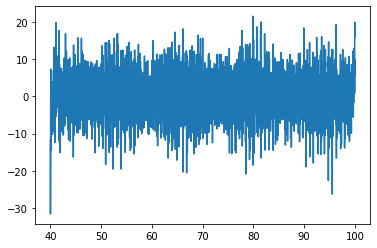

In [33]:
g_t2 = g_t.copy()
g_t2[freq < 0.5] = 0
g_t2[freq > 35] = 0
y = fft.irfft(g_t2)
plt.plot(t[:-1], y)

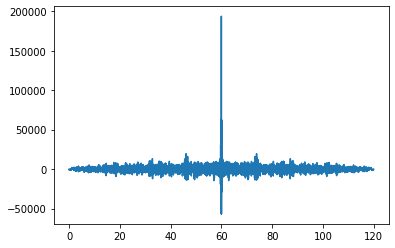

In [31]:
c = signal.correlate(y, y) 
t2 = np.arange(len(c))/f
plt.plot(t2, c)


max freq:  53.02209253855773


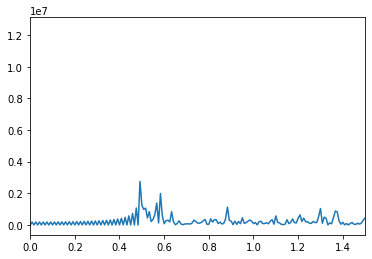

In [11]:
fc = fft.rfft(c)
freq2 = fft.rfftfreq(len(c), d = 1/f)
power = np.abs(fc)
plt.plot(freq2, power)
plt.xlim(0,1.5)
search_freq = freq2[(freq2 > BPM_min) & (freq2 < BPM_max)]
hr = search_freq[np.argmax(power[(freq2 > BPM_min) & (freq2 < BPM_max)])]
print('max freq: ', hr*60)

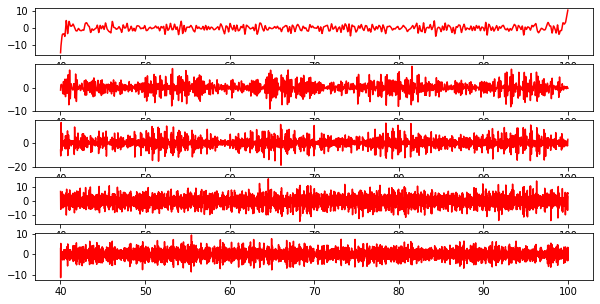

In [68]:
import pywt
n = 4
coeffs = pywt.wavedec(y, 'sym4', level = n)
sigs = np.zeros((n+1,len(t)-1))
for i in range(n+1):
    ca = coeffs.copy()
    for j in range(n+1):
        if j != i: 
            ca[j] = np.zeros_like(ca[j])
    sigs[i] = pywt.waverec(ca, 'sym4')

ax = []
fig, ax = plt.subplots(nrows = n+1, ncols = 1, figsize = (10, 5))
for i in range(n+1):
    ax[i].plot(t[:-1], sigs[i], color = 'red')
